In [1]:
from PyHeisenberg import HeisenbergGraph, DataAnalyzer

In [6]:
testGraph = HeisenbergGraph(
    spinInteractions={
        (0, 1): [0.5, 0.7, 0.2],
        (1, 2): [0.7, 0.2, 0.5],
        # (0, 2): [1, 1, 1],
        # (1, 2): [1, 1, 1],
        # (2, 3): [1, 1, 1],
        # (3, 0): [1, 1, 1],
    },
    externalField={
        0: [0.0, 0.0, 0.8],
        1: [0.0, 0.0, 0.3],
        2: [0.0, 0.0, 0.2],
        # 3: [0, 0, 0],
    },
    localSimulation=True,
    # initialState=np.array([1, 0, 0, 0])
)
testAnalyzer = DataAnalyzer()

In [9]:
exactEvolution = testGraph.exactEvolutionSeries(t=3.4)
simulatedEvolution = testGraph.evolutionSeries(STEPS=100, t=3.4)

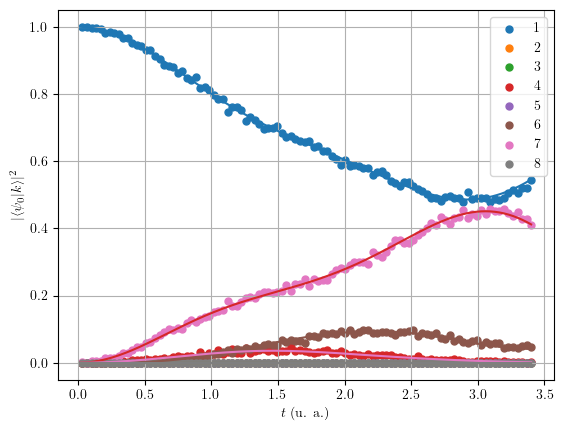

In [10]:
testAnalyzer.comparativeEvolution(
    exactEvolution,
    simulatedEvolution
)